In [1]:
%matplotlib inline
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from statistics import mode

In [7]:
def generate_cluster(cov = [[1, 0], [0, 1]], N = None):

    if N is None or len(N) != 3:
        N = [200]*3
        
    means = [random.randint(1,9),random.randint(1,9)]
    
    X_1 = (np.random.multivariate_normal(means, cov, N[0]))
    original_label = np.asarray([0]*N[0], dtype='int32')
    label = ['ro']*N[0]
    plt.plot(X_1[:, 0], X_1[:, 1], 'ro')
    
    means = [random.randint(1,9),random.randint(1,9)]
    
    X_2 = (np.random.multivariate_normal(means, cov, N[0]))
    original_label = np.concatenate((original_label, np.asarray([0]*N[0], dtype='int32')), axis = 0)
    label.extend(['go']*N[0])
    plt.plot(X_2[:, 0], X_2[:, 1], 'go')
    
    
    means = [random.randint(1,9),random.randint(1,9)]
    
    X_3 = (np.random.multivariate_normal(means, cov, N[0]))
    original_label = np.concatenate((original_label, np.asarray([0]*N[0], dtype='int32')), axis = 0)
    label.extend(['bo']*N[0])
    plt.plot(X_3[:, 0], X_3[:, 1], 'bo')
    
    X = np.concatenate((X_1, X_2, X_3), axis = 0)
            
    original_label = original_label.T
    plt.show()
    return (X, label)

In [3]:
class KNN:
    def __init__(self, X, Y, k = 5):
        self.data = X
        self.label = Y
        self.k = k
        
    def evaluation(self, es_data, k = 5):
        D = cdist(es_data, self.data)
        ind = np.argpartition(D, k)[0,:k]
        tmp = [self.label[a] for a in ind]
        counts = mode(tmp)
        return (counts)

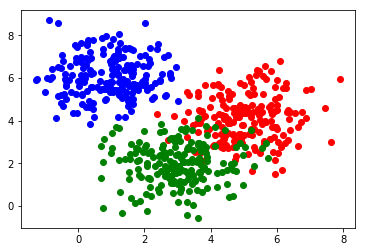

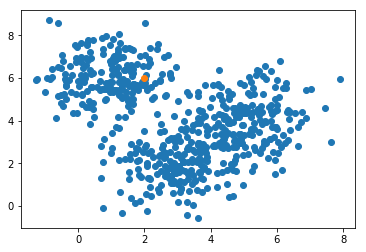

Predict class is: 
bo


In [14]:
X, Y = generate_cluster()
knn = KNN(X, Y, 6)
point = np.asarray([[2, 6]])
nearest = knn.evaluation(point)
plt.plot(X[:,0],X[:,1], 'o'  )
plt.plot(point[:,0],point[:,1], 'o'  )
plt.show()

print('Predict class is: ')
print(nearest)